In this project, our goal is to build a predictive model for stock prices using historical stock data. We will begin by performing data wrangling and exploratory data analysis (EDA) to gain insights into the dataset and prepare it for modeling. This includes handling missing values, generating descriptive statistics, and visualizing the data. After preprocessing, we will create and evaluate a machine learning model to predict future stock prices. By the end of this project, we aim to understand the patterns in stock price movements and develop a robust model that can make accurate predictions.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the data
df = pd.read_csv('Downloads/archive (3)/GOOG.csv')

# Display the first few rows of the dataset
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


We start by importing the necessary library, pandas, and loading the stock price dataset from the specified path. Displaying the first few rows helps us verify that the data has been loaded correctly.

In [2]:
# Check the data types
df.dtypes

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Verify the conversion
df.dtypes


symbol                      object
date           datetime64[ns, UTC]
close                      float64
high                       float64
low                        float64
open                       float64
volume                       int64
adjClose                   float64
adjHigh                    float64
adjLow                     float64
adjOpen                    float64
adjVolume                    int64
divCash                    float64
splitFactor                float64
dtype: object

We check the data types of each column to ensure they are appropriate for analysis. Specifically, we convert the 'date' column to datetime format to facilitate time-based operations and analyses.

In [3]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Verify there are no missing values left
df.isnull().sum()


symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

We check for missing values in the dataset. If any missing values are found, we drop the corresponding rows to ensure the dataset is complete and ready for analysis.

In [4]:
# Get descriptive statistics for numerical columns
df.describe()


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


We generate descriptive statistics for the numerical columns in the dataset. This provides a summary of key metrics such as mean, standard deviation, and percentiles, which helps us understand the distribution and central tendency of the data.

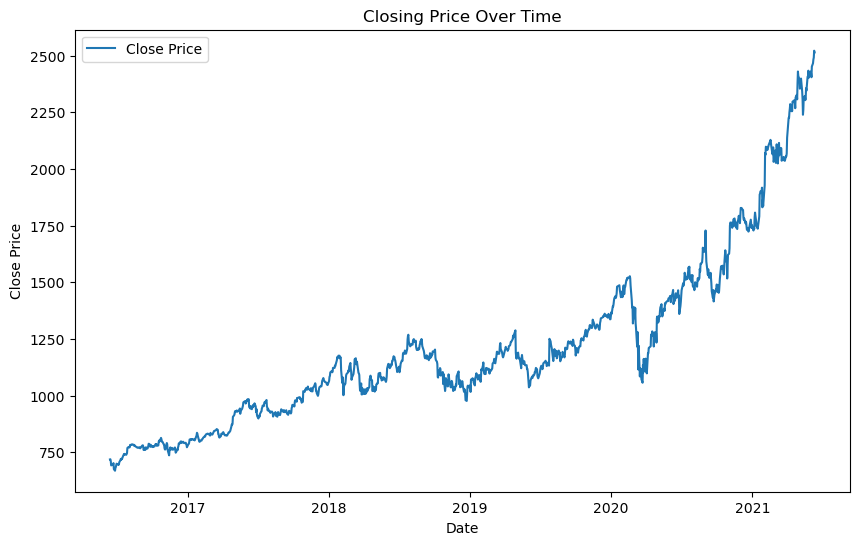

In [5]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()


We visualize the closing price of the stock over time using a line plot. This helps us identify trends, patterns, and potential anomalies in the stock prices over the given period.

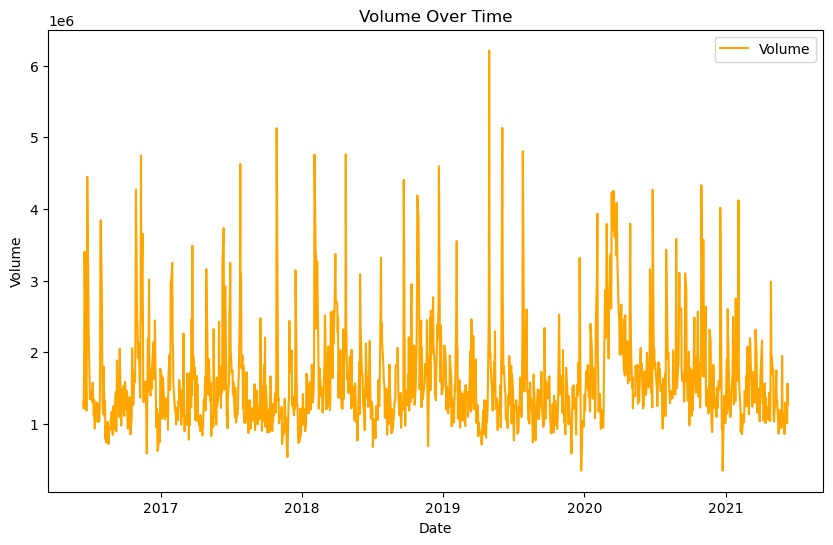

In [6]:
# Plot volume over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.legend()
plt.show()


We plot the trading volume of the stock over time. Analyzing volume trends can provide insights into the trading activity and liquidity of the stock.

C:\Users\eschneid\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


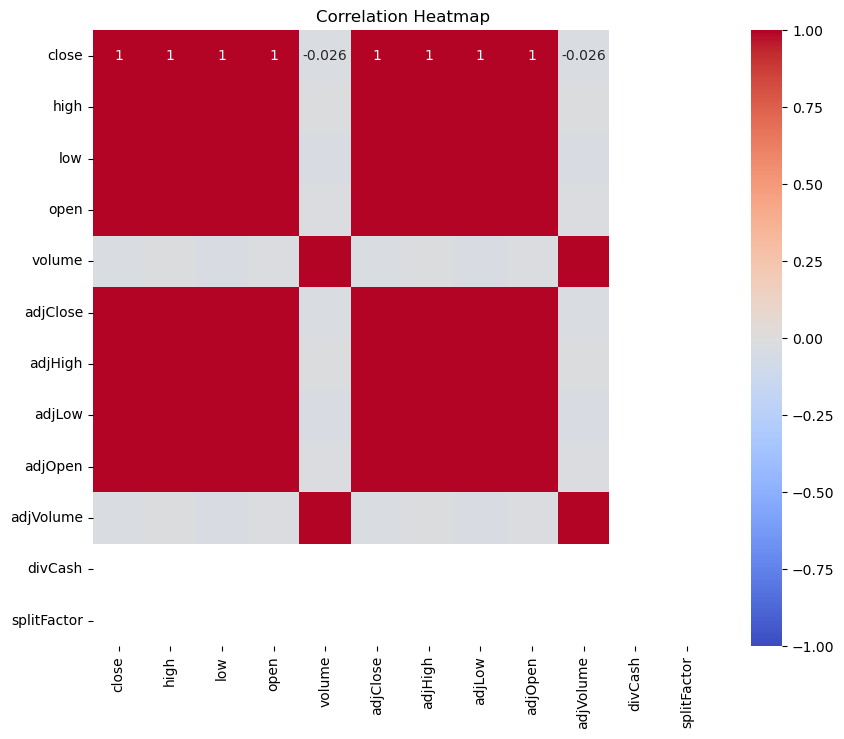

In [9]:
# Import Libraries
import seaborn as sns
import numpy as np

# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


We compute and visualize the correlation matrix for the numerical features in the dataset. A heatmap allows us to see the strength and direction of relationships between different features, which can inform feature selection and engineering.

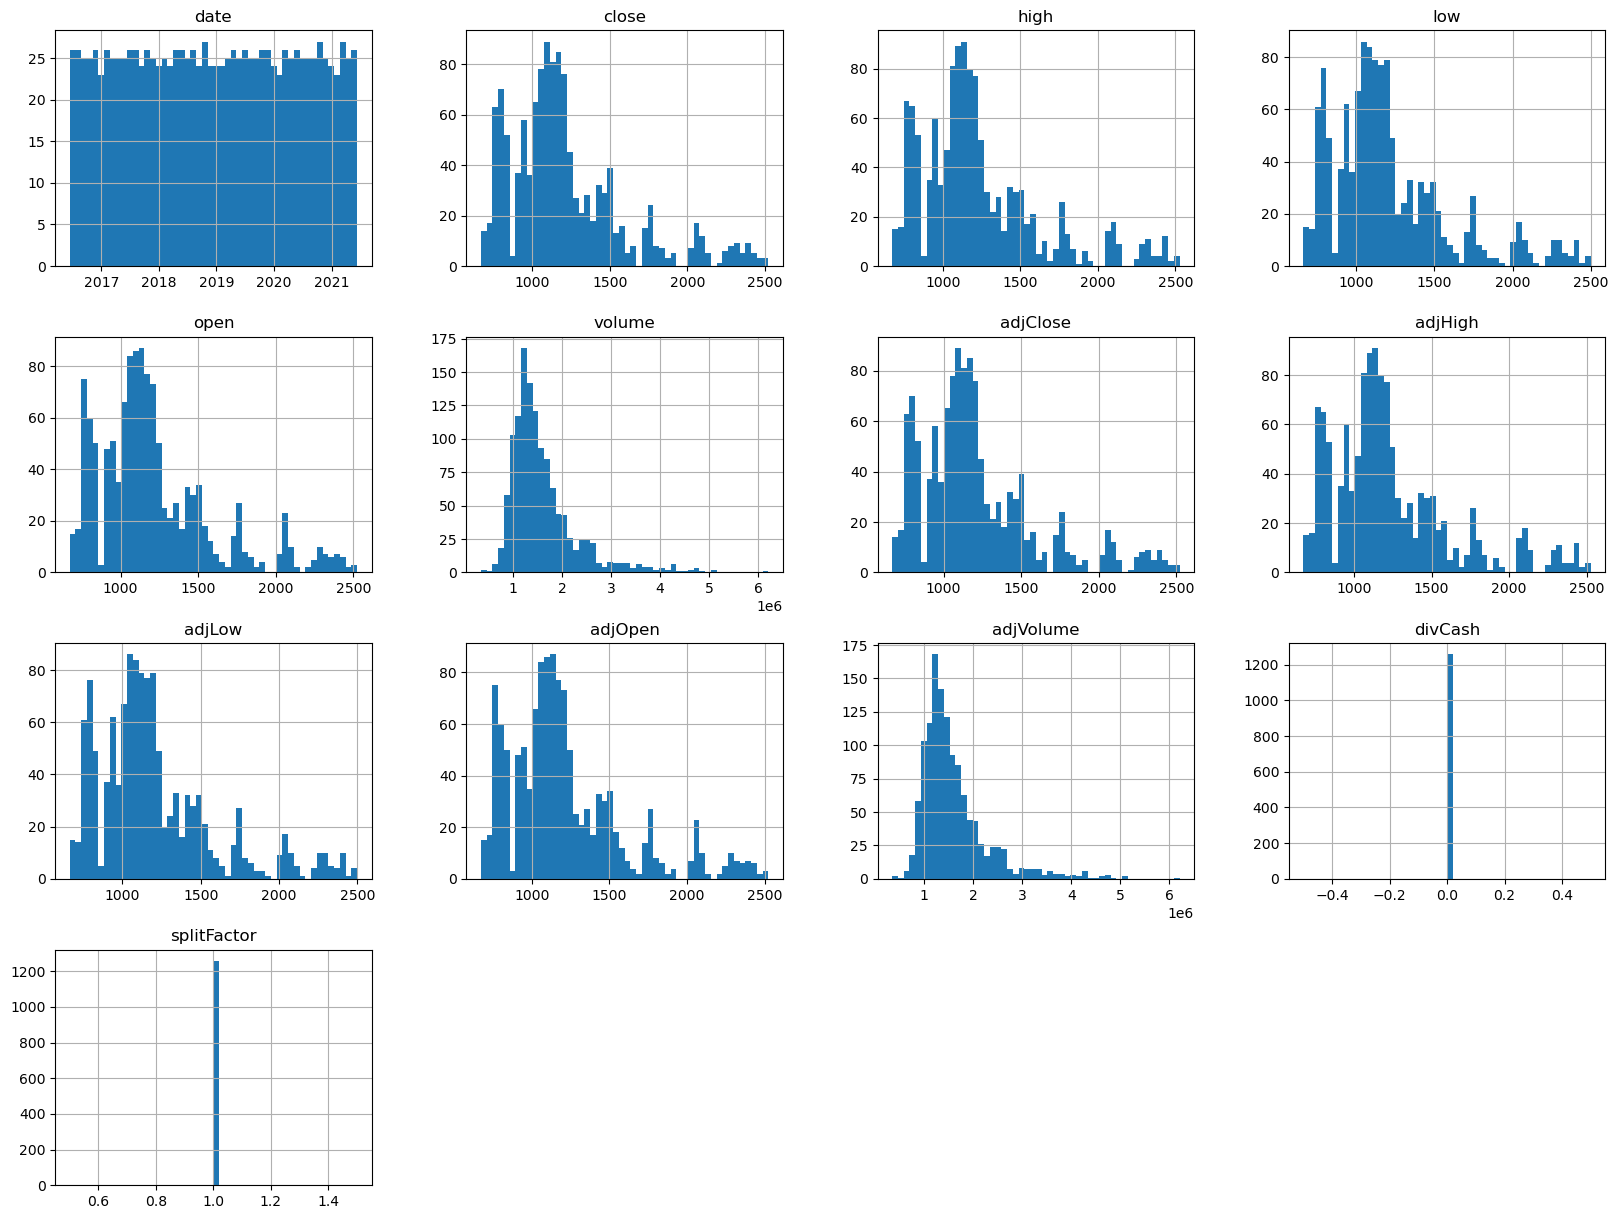

In [10]:
# Plot distribution of numerical features
df.hist(bins=50, figsize=(20, 15))
plt.show()


We plot histograms for each numerical feature to visualize their distributions. This helps us understand the spread, skewness, and presence of outliers in the data.

In [11]:
# Create additional time-related features
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Display the updated DataFrame with the new features
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,day_of_week,month,year
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0,1,6,2016
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0,2,6,2016
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0,3,6,2016
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0,4,6,2016
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0,0,6,2016


We create new features based on the date, such as the day of the week, month, and year. These features can capture temporal patterns and improve the performance of time series models.

In this project, we started with data wrangling and exploratory data analysis (EDA) to prepare our stock price dataset for modeling. We handled missing values, converted data types, and generated descriptive statistics to understand the dataset's characteristics. We visualized key features such as closing prices and trading volumes over time, and explored the relationships between different features using a correlation heatmap. Additional time-based features were created to capture temporal patterns in the data. This comprehensive preprocessing and EDA set the stage for building and evaluating a predictive model for stock prices. By understanding the data and its underlying patterns, we aim to develop a robust model that can accurately predict future stock prices.